In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
rm(list = ls())
gc()
setwd('/home/data/t060324/jobs/aimin/')

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, r

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8023918,428.6,14744647,787.5,11306153,603.9
Vcells,13803422,105.4,21468864,163.8,17824008,136.0


### Stromal cells of GSE184880 

In [2]:
GSE184880_sub <- readRDS(file = './output/GSE184880_object.rds')

In [49]:
table(GSE184880_sub$cellType_auto)


                 T                 NK               fibo                Epi 
             14347               4181              19010               8572 
           myeloid                  B             plasma               endo 
              6105                765               1468               3144 
proliferating cell 
              2012 

In [50]:
OV_GSE184880_CAF <- subset(GSE184880_sub,cellType_auto %in% c('fibo','endo'))
rm(GSE184880_sub)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8360165,446.5,15352705,820.0,15352705,820.0
Vcells,958714166,7314.5,2337945657,17837.2,2332003598,17791.8


In [51]:
OV_GSE184880_CAF$sample <- OV_GSE184880_CAF$patient_id

In [52]:
OV_GSE184880_CAF@meta.data <- OV_GSE184880_CAF@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]

In [53]:
OV_GSE184880_CAF[['integrated']] <- NULL
OV_GSE184880_CAF[['module_AUC']] <- NULL
OV_GSE184880_CAF

An object of class Seurat 
27984 features across 22154 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [54]:
saveRDS(OV_GSE184880_CAF,file='./output/1.sangleCell_pre/OV_GSE184880_CAF.RDS')

### Stromal cells of GSE165897

In [55]:
OV_GSE165897 <- readRDS(file = './output/GSE165897.merge.object.rds')

In [56]:
OV_GSE165897_CAF <- subset(OV_GSE165897,cellType_auto %in% c('fibo','endo'))
rm(OV_GSE165897)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8359980,446.5,15352705,820.0,15352705,820.0
Vcells,849585864,6481.9,2337945657,17837.2,2332003598,17791.8


In [57]:
OV_GSE165897_CAF@meta.data <- OV_GSE165897_CAF@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]

In [58]:
OV_GSE165897_CAF[['module_AUC']] <- NULL
OV_GSE165897_CAF

An object of class Seurat 
32847 features across 8008 samples within 1 assay 
Active assay: RNA (32847 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [59]:
saveRDS(OV_GSE165897_CAF,file = './output/OV_GSE165897_CAF.rds')

### Stromal cells of GSE191301

In [60]:
OV_GSE191301 <- readRDS(file = './output/OV_GSE191301.rds')

In [61]:
DefaultAssay(OV_GSE191301) <- 'RNA'
table(OV_GSE191301$cellType_auto)


                 B               endo                Epi               fibo 
               503                239               5349                822 
           myeloid                 NK             plasma proliferating cell 
              9913               1779                 41               1130 
                 T 
             11601 

In [62]:
OV_GSE191301_CAF <- subset(OV_GSE191301,cellType_auto %in% c('fibo','endo'))
rm(OV_GSE191301)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8359950,446.5,15352705,820.0,15352705,820.0
Vcells,852392361,6503.3,2337945657,17837.2,2332003598,17791.8


In [63]:
OV_GSE191301_CAF@meta.data <- OV_GSE191301_CAF@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]

In [64]:
OV_GSE191301_CAF[['module_AUC']] <- NULL
OV_GSE191301_CAF

An object of class Seurat 
27984 features across 1061 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [65]:
saveRDS(OV_GSE191301_CAF,file = './output/OV_GSE191301_CAF.rds')

### Stromal cells of GSE154600

In [66]:
OV_GSE154600  <- readRDS(file = './output/OV_GSE154600_object.rds')

In [67]:
DefaultAssay(OV_GSE154600) <- 'RNA'
table(OV_GSE154600$cellType_auto)


                 T                 NK               fibo                Epi 
             14112               1163               9217              11223 
           myeloid                  B             plasma               endo 
              8546                936               1376               1281 
proliferating cell 
               987 

In [68]:
OV_GSE154600_CAF <- subset(OV_GSE154600,cellType_auto %in% c('fibo','endo'))
rm(OV_GSE154600)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8399940,448.7,15352705,820.0,15352705,820.0
Vcells,909141871,6936.3,2337945657,17837.2,2332003598,17791.8


In [69]:
OV_GSE154600_CAF$sample <- OV_GSE154600_CAF$patient_id
OV_GSE154600_CAF@meta.data <- OV_GSE154600_CAF@meta.data[,c('orig.ident','nCount_RNA','nFeature_RNA','sample','patient_id','cellType_auto')]

In [70]:
OV_GSE154600_CAF[['module_AUC']] <- NULL
OV_GSE154600_CAF[['integrated']] <- NULL
OV_GSE154600_CAF

An object of class Seurat 
33538 features across 10498 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 2 dimensional reductions calculated: umap, tsne

In [71]:
saveRDS(OV_GSE154600_CAF,file='./output/1.sangleCell_pre/OV_GSE154600_CAF.RDS')

## 0.Data integration

In [44]:
OV_GSE184880_CAF <- readRDS(file='./output/1.sangleCell_pre/OV_GSE184880_CAF.RDS')
OV_GSE165897_CAF <- readRDS(file = './output/OV_GSE165897_CAF.rds')
OV_GSE191301_CAF <- readRDS(file = './output/OV_GSE191301_CAF.rds')
OV_GSE154600_CAF <- readRDS(file='./output/1.sangleCell_pre/OV_GSE154600_CAF.RDS')

In [45]:
OV_GSE165897_CAF$dataset <- 'GSE165897'
OV_GSE184880_CAF$dataset <- 'GSE184880'
OV_GSE154600_CAF$dataset <- 'GSE154600'
OV_GSE191301_CAF$dataset <- 'GSE191301'

In [46]:
OV_GSE154600_CAF$patient_id <- OV_GSE154600_CAF$orig.ident
OV_GSE154600_CAF$sample <- OV_GSE154600_CAF$orig.ident

In [47]:
DefaultAssay(OV_GSE165897_CAF) <- 'RNA'
OV_GSE165897_CAF.list <- SplitObject(OV_GSE165897_CAF,split.by = 'patient_id')
DefaultAssay(OV_GSE184880_CAF) <- 'RNA'
OV_GSE184880_CAF.list <- SplitObject(OV_GSE184880_CAF,split.by = 'patient_id')
DefaultAssay(OV_GSE154600_CAF) <- 'RNA'
OV_GSE154600_CAF.list <- SplitObject(OV_GSE154600_CAF,split.by = 'patient_id')
DefaultAssay(OV_GSE191301_CAF) <- 'RNA'
OV_GSE191301_CAF.list <- SplitObject(OV_GSE191301_CAF,split.by = 'sample')


In [52]:
mergeData.list <- c(OV_GSE165897_CAF.list,OV_GSE184880_CAF.list,OV_GSE154600_CAF.list,OV_GSE191301_CAF.list)
names(mergeData.list)

[1] "EOC443"     "EOC3"       "EOC372"     "EOC540"     "EOC87"     
 [6] "EOC136"     "EOC1005"    "EOC733"     "EOC153"     "EOC349"    
[11] "EOC227"     "GSM5599220" "GSM5599221" "GSM5599222" "GSM5599223"
[16] "GSM5599224" "GSM5599225" "GSM5599226" "GSM5599227" "GSM5599228"
[21] "GSM5599229" "GSM5599230" "GSM5599231" "T59"        "T76"       
[26] "T77"        "T89"        "T90"        "GSM5743307" "GSM5743308"
[31] "GSM5743309" "GSM5743310" "GSM5743311" "GSM5743312"

In [53]:
SeuratPreTreatment <- function(obj=NULL,counts,metadata,QC=FALSE,cluster=TRUE,nCount_cut=500,nFeature_cut=200,log10GenesPerUMI_cut=0.8,mitoRatio_cut=0.2){
    if(is.null(obj)){
        obj <- CreateSeuratObject(counts,meta.data = metadata)
    }
    obj$mitoRatio <- PercentageFeatureSet(object = obj, pattern = "^MT-")
    obj$mitoRatio <- obj@meta.data$mitoRatio / 100
    obj$log10GenesPerUMI <- log10(obj$nFeature_RNA)/log10(obj$nCount_RNA)
    obj$riboRatio <- PercentageFeatureSet(object = obj, pattern = "^RP[SL]")
    obj$riboRatio <- obj@meta.data$mitoRatio / 100
    if(QC){
        filtered_obj <- subset(x = obj, subset= (nCount_RNA >= nCount_cut) & 
                          (nFeature_RNA >= nFeature_cut) & 
                          (log10GenesPerUMI > log10GenesPerUMI_cut) & 
                          (mitoRatio < mitoRatio_cut))
        print(dim(filtered_obj))
        if(cluster){
        filtered_obj <- NormalizeData(filtered_obj, normalization.method = "LogNormalize")
        filtered_obj <- FindVariableFeatures(filtered_obj, selection.method = "vst", nfeatures = 3000)
        filtered_obj <- ScaleData(filtered_obj, vars.to.regress = c('nCount_RNA'))
        filtered_obj <- RunPCA(filtered_obj)
        filtered_obj <- RunUMAP(filtered_obj,reduction = "pca",dims = 1:30,seed.use = 12345)
        filtered_obj <- FindNeighbors(filtered_obj,reduction = 'pca', dims = 1:30, verbose = FALSE)
        filtered_obj <- FindClusters(filtered_obj,resolution = 0.5, verbose = FALSE,random.seed=20210707)
        }

        return(filtered_obj)
    }else{
        if(cluster){
        obj <- NormalizeData(obj, normalization.method = "LogNormalize")
        obj <- FindVariableFeatures(obj, selection.method = "vst", nfeatures = 3000)
        obj <- ScaleData(obj, vars.to.regress = c('nCount_RNA'))
        obj <-  RunPCA(obj)
        obj <- RunUMAP(obj,reduction = "pca",dims = 1:30,seed.use = 12345)
        obj <- FindNeighbors(obj,reduction = 'pca', dims = 1:30, verbose = FALSE)
        obj <- FindClusters(obj,resolution = 0.5, verbose = FALSE,random.seed=20210707)
            }
        return(obj)
    }
    

}

In [54]:
mergeData.list <- lapply(mergeData.list,FUN = function(x){
    SeuratPreTreatment(obj = x,QC=T,cluster=F)
})


[1] 32847   670
[1] 32847   712
[1] 32847  2280
[1] 32847   551
[1] 32847   541
[1] 32847  1359
[1] 32847   447
[1] 32847    63
[1] 32847   853
[1] 32847   361
[1] 32847    52
[1] 27984  5013
[1] 27984  4038
[1] 27984  1866
[1] 27984  5026
[1] 27984  1909
[1] 27984   117
[1] 27984   780
[1] 27984    25
[1] 27984    82
[1] 27984   172
[1] 27984  1544
[1] 27984    12
[1] 33538  2406
[1] 33538  6920
[1] 33538   191
[1] 33538   602
[1] 33538   379
[1] 27984   269
[1] 27984    22
[1] 27984   158
[1] 27984   445
[1] 27984    76
[1] 27984    91


In [55]:
mergeData_CAF <- merge(mergeData.list[[1]],mergeData.list[-1])


In [56]:
rm(OV_GSE165897_CAF)
rm(OV_GSE165897_CAF.list)
rm(OV_GSE184880_CAF)
rm(OV_GSE184880_CAF.list)
rm(OV_GSE154600_CAF)
rm(OV_GSE154600_CAF.list)
rm(OV_GSE191301_CAF)
rm(OV_GSE191301_CAF.list)


In [57]:
table(mergeData_CAF$dataset)


GSE154600 GSE165897 GSE184880 GSE191301 
    10498      7889     20584      1061 

In [59]:
ls()

[1] "cellMarkers"              "genes_to_check"          
[3] "GSE184880_sub"            "mergeData_CAF"           
[5] "mergeData.list"           "OV_GSE154600_immune.list"
[7] "SeuratPreTreatment"

In [60]:
rm(GSE184880_sub)
rm(OV_GSE154600_immune.list)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8316631,444.2,15352707,820.0,15352707,820.0
Vcells,1133729364,8649.7,3468401390,26461.9,4311271673,32892.4


In [58]:
mergeData.list <- SplitObject(mergeData_CAF,split.by = 'dataset')

In [221]:
mergeData.list

$GSE165897
An object of class Seurat 
47605 features across 7889 samples within 1 assay 
Active assay: RNA (47605 features, 2000 variable features)

$GSE184880
An object of class Seurat 
47605 features across 20584 samples within 1 assay 
Active assay: RNA (47605 features, 2000 variable features)

$GSE154600
An object of class Seurat 
47605 features across 10498 samples within 1 assay 
Active assay: RNA (47605 features, 2000 variable features)

$GSE191301
An object of class Seurat 
47605 features across 1061 samples within 1 assay 
Active assay: RNA (47605 features, 2000 variable features)


In [222]:
mergeData.list <- lapply(mergeData.list,FUN = function(x){
    SeuratPreTreatment(obj = x,QC=F,cluster=T)
})

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  PDLIM4, HMGA1, GAL, CADM1, CTSL, MMP1, GSTO1, CLMP, RSAD2, SMOX 
	   EVA1A, ADAMTS12, TNIP1, ZNF267, TXN, SQSTM1, GPR68, CDKN2A, PDPN, CD59 
	   AMPD3, RAI14, MX1, INSIG1, HMGA2, H2AFY2, TBX3, MGLL, PKIG, NETO1 
Negative:  FOSB, KLF4, TMSB4X, CCDC80, CYR61, HSPB1, NNMT, ACTG1, ACTB, GADD45B 
	   EGR1, CTGF, FOS, ZFP36L2, SEPP1, JUN, EFEMP1, PDLIM1, MGP, TMSB10 
	   ZFP36, C3, CEBPD, NR4A1, RARRES1, BGN, KRT8, SGK1, MYL9, KLF6 
PC_ 2 
Positive:  COL1A1, COL3A1, CTHRC1, FN1, SPARC, MMP11, COL1A2, COL5A2, THY1, CALD1 
	   SERPINH1, POSTN, COL11A1, CTSB, COL5A1, CERCAM, ISLR, COL6A1, MYL9, HTRA1 
	   RARRES2, CTSK, TPM2, SDC1, COL12A1, COL6A3, TGFBI, SULF1, LOXL1, CNN2 
Negative:  MGP, TFPI2, MEDAG, MGST1, C7, CFD, SOD2, MT1A, MT2A, AKR1C1 
	   IL6, GPRC5A, THAP2, MARCH3, APOD, VASN, FOSL1, MAP1B, VEGFA, FGF2 
	   ARC, PTGS2, PLIN2, TFPI, GSN, LIF, CXCL2, GPX3, MYC, CREB5 
PC_ 3 
Positive:  LUM, DCN, SFRP2, IGF

21:03:05 UMAP embedding parameters a = 0.9922 b = 1.112

21:03:06 Read 10498 rows and found 30 numeric columns

21:03:06 Using Annoy for neighbor search, n_neighbors = 30

21:03:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:03:08 Writing NN index file to temp file /home/data/t060324/Rtmp/RtmpTZsQTm/file297edc5a6cf379

21:03:08 Searching Annoy index using 1 thread, search_k = 3000

21:03:12 Annoy recall = 100%

21:03:15 Commencing smooth kNN distance calibration using 1 thread

21:03:18 Initializing from normalized Laplacian + noise

21:03:19 Commencing optimization for 200 epochs, with 448686 positive edges

21:03:25 Optimization finished

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  COL1A1, COL3A1, DCN, COL1A2, C1S, RARRES2, 

In [70]:
#DefaultAssay(mergeData_CAF) <- 'RNA'
#mergeData_CAF <- NormalizeData(mergeData_CAF, normalization.method = "LogNormalize")
#mergeData_CAF <- FindVariableFeatures(mergeData_CAF, selection.method = "vst", nfeatures = 3000)
#mergeData_CAF <- ScaleData(mergeData_CAF,vars.to.regress = c('nCount_RNA'))
mergeData_CAF <- RunPCA(mergeData_CAF)

PC_ 1 
Positive:  VWF, CDH5, ADGRL4, FLT1, CLEC14A, CD93, MMRN2, SHANK3, TM4SF18, ROBO4 
	   PTPRB, EMCN, PECAM1, EGFL7, ESAM, ITGA6, KDR, NOSTRIN, SOX18, CXorf36 
	   RBP7, PODXL, CYYR1, A2M, PCDH17, LMO2, ADGRF5, MYCT1, TIE1, CALCRL 
Negative:  DCN, RARRES2, COL1A1, COL1A2, C1R, COL3A1, TPM2, AEBP1, CCDC80, PDGFRA 
	   FTL, FTH1, RBP1, TMEM176A, COL5A2, OGN, LUM, COL12A1, TAGLN, SERPINE2 
	   FILIP1L, C7, TPM1, ISLR, SDC2, PDGFRL, FBLN1, MYL9, TCF21, IGFBP5 
PC_ 2 
Positive:  SELENOP, C7, ABLIM1, NR4A1, MATN2, STAR, ABCA8, APOE, TGFBR3, NR2F2 
	   FOSB, OGN, PPP1R14A, KLF4, TCF21, WISP2, SLC7A2, PEG10, HSPB6, AKAP12 
	   SFRP1, CFD, ZFP36L2, ALDH1A1, RHOB, COLEC11, ADIRF, BTG2, SYNPO2, PDK4 
Negative:  CTHRC1, MMP11, POSTN, TMEM158, VCAN, CHRNA1, FN1, COL10A1, S100A4, MME 
	   PTGDS, PLAU, SCG2, CTSK, GJB2, COL11A1, CHN1, ISG15, DERL3, COL5A2 
	   MEGF10, TDO2, LUM, SFRP2, IFI27, COL8A1, NTM, THBS2, ARL4C, PMEPA1 
PC_ 3 
Positive:  RGS5, NOTCH3, GUCY1B3, TBX2, GUCY1A2, HIGD1B, NDUFA4

In [126]:
mergeData_CAF <- RunHarmony(object = mergeData_CAF,group.by.vars = c('patient_id'),assay.use = 'RNA')

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.integrated.harmony; see ?make.names for more details on syntax validity”


In [230]:
mergeData_CAF <- RunUMAP(mergeData_CAF,reduction = "harmony",dims = 1:50,seed.use = 12345)
mergeData_CAF <- FindNeighbors(mergeData_CAF,reduction = 'harmony', dims = 1:50, verbose = FALSE)
mergeData_CAF <- RunTSNE(mergeData_CAF,reduction = 'harmony',dims = 1:50,seed.use = 12345)

21:22:11 UMAP embedding parameters a = 0.9922 b = 1.112

21:22:12 Read 35765 rows and found 50 numeric columns

21:22:12 Using Annoy for neighbor search, n_neighbors = 30

21:22:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:22:18 Writing NN index file to temp file /home/data/t060324/Rtmp/RtmpTZsQTm/file297edc6ba4a480

21:22:18 Searching Annoy index using 1 thread, search_k = 3000

21:22:33 Annoy recall = 100%

21:22:35 Commencing smooth kNN distance calibration using 1 thread

21:22:39 Initializing from normalized Laplacian + noise

21:22:41 Commencing optimization for 200 epochs, with 1662886 positive edges

21:23:00 Optimization finished



## 1.Reclustering and cell annotation

In [231]:
mergeData_CAF <- FindClusters(mergeData_CAF,resolution = 0.5, verbose = FALSE,random.seed=20210707)

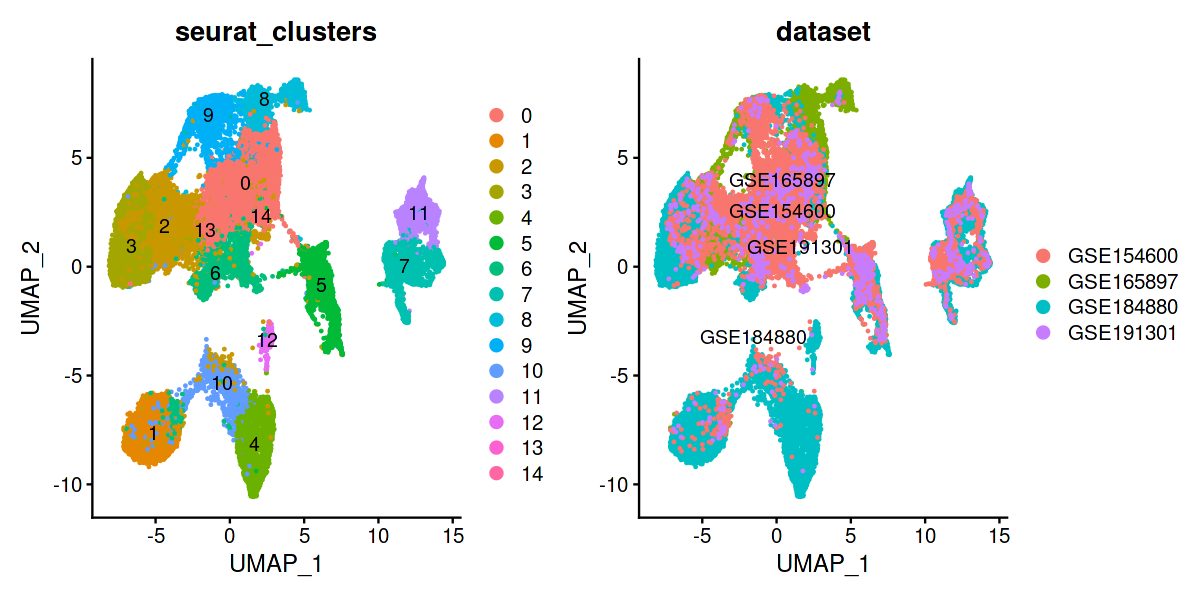

In [232]:
options(repr.plot.height = 5, repr.plot.width = 10)
DimPlot(object = mergeData_CAF,reduction = 'umap',group.by = c('seurat_clusters','dataset'),pt.size = 0.3, label = TRUE)

In [235]:
genes_to_check = c('PTPRC', 'CD3D', 'CD3E','BTLA', 'CD4','CD8A','CXCR6','CD27','CD69','ITGAE','CXCL13','LAG3','GZMA',
                   'GZMK', 'CD79A', 'MS4A1' ,'PDCD1','TIGIT','CTLA4','IL2RA','FOXP3','IL7R','CCR7',
                   'IGHG1', 'MZB1', 'SDC1',
                   'CD68', 'CD163', 'VCAN', 'FOSB','JUNB','IL6',
                   'TPSAB1' , 'TPSB2',  # mast cells,
                   'RCVRN','FPR1' , 'VIM' ,
                   'C1QA',  'C1QB',  # mac
                   'S100A9', 'S100A8','POSTN', 'MMP1','ATF4','THBS1','THBS2','CYR61','CXCL12',# monocyte
                   'LAMP3', 'IDO1','JUNB',## DC3 
                   'CD1E','CD1C', # DC2
                   'KRT86','GNLY', # NK 
                   'FGF7','MME', 'ACTA2','MYH11','TAGLN', ## fibo 
                   'DCN', 'LUM',  'GSN' , ## mouse PDAC fibo 
                   'FAP','FN1','THY1','COL1A1','COL3A1', 
                   'PECAM1', 'VWF',  ## endo 
                   'EPCAM' , 'KRT19', 'KRT18', 'CD24','MKI67' )
                   

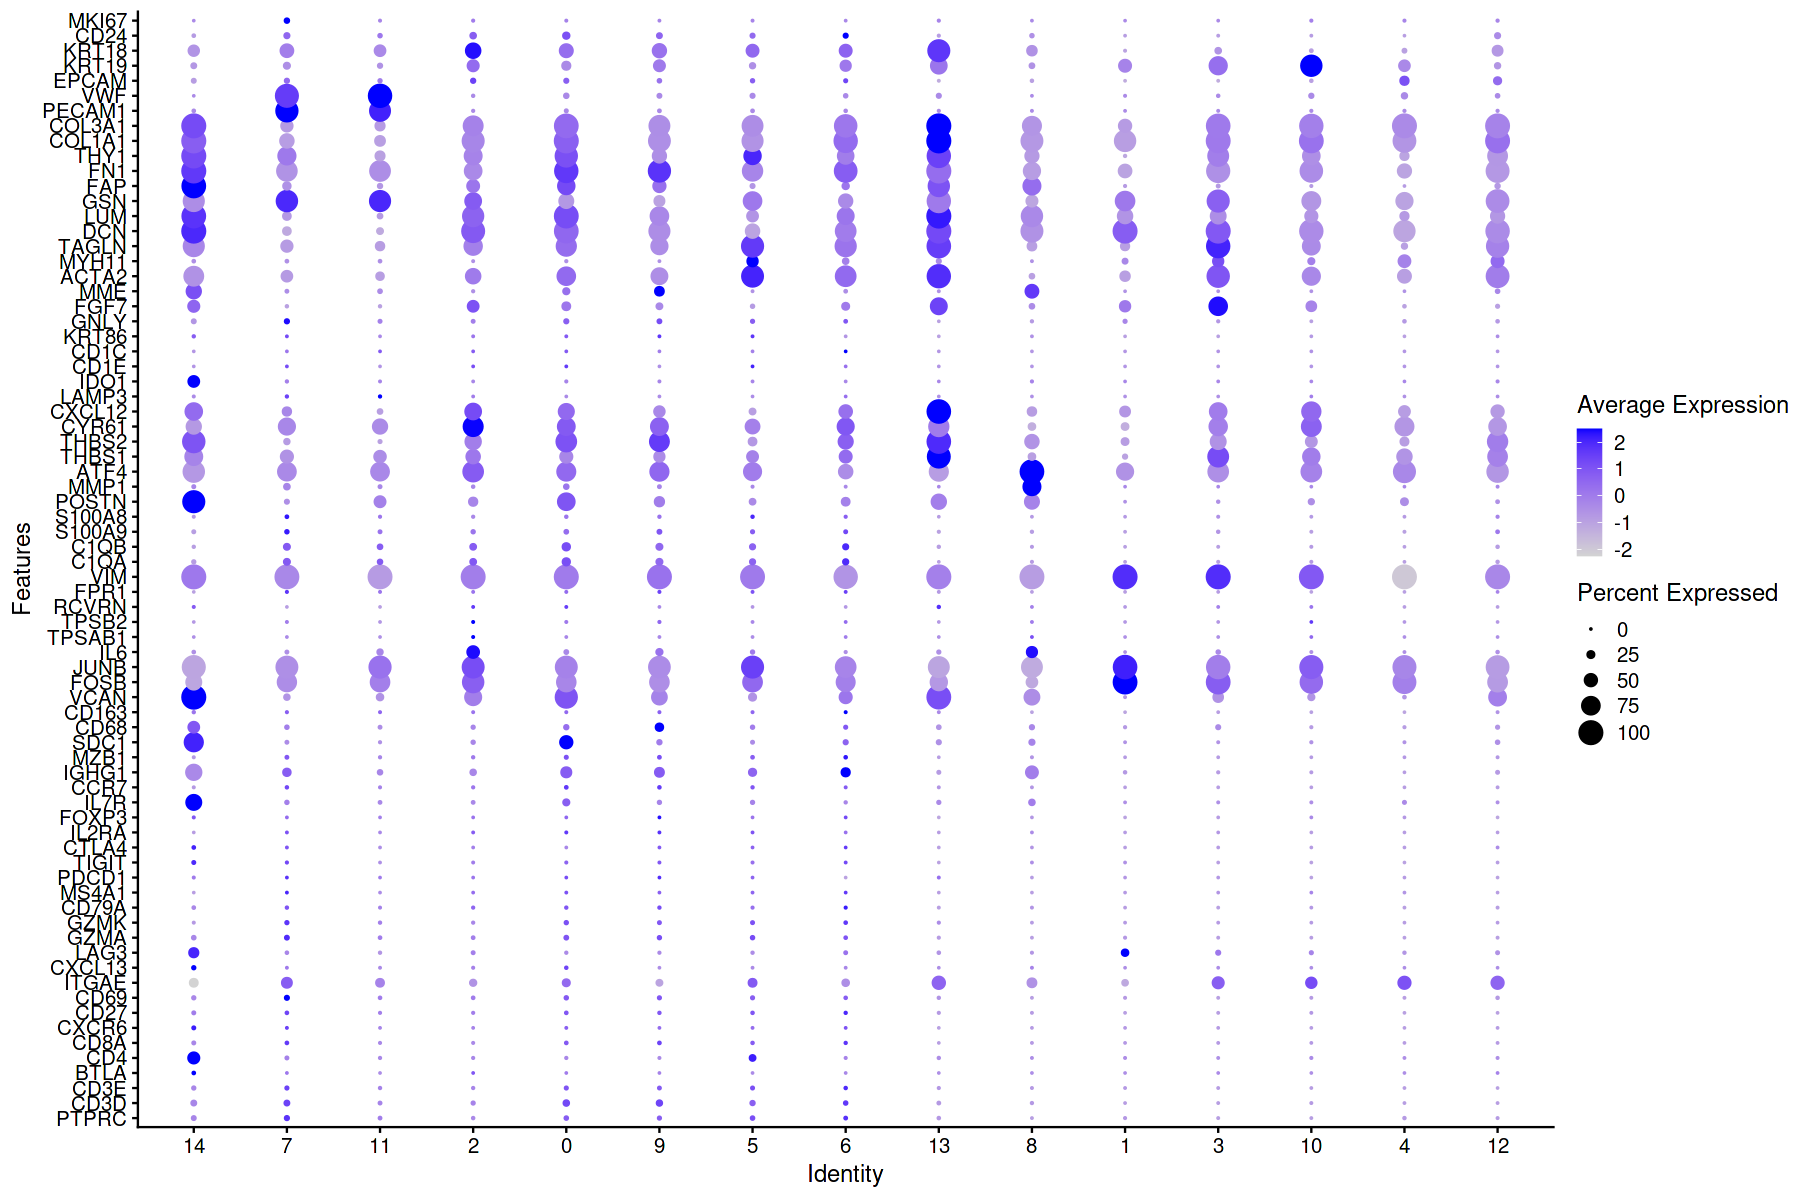

In [236]:
options(repr.plot.height = 10, repr.plot.width = 15)
DotPlot(mergeData_CAF,group.by = 'seurat_clusters', features = unique(genes_to_check),assay = 'RNA',cluster.idents = T) + coord_flip()

In [ ]:
#c(14,18,16,22,24,20,13,17,15,21)

In [69]:
#mergeData_CAF <- subset(mergeData_CAF,seurat_clusters %in% c(0:12,19,23))
#mergeData_CAF <- subset(mergeData_CAF,seurat_clusters %in% c(0:9,11:13))

In [283]:
endo <- c(11,7)
MSC1 <- c(1)
MSC2 <- c(10)
MSC3 <- c(4)
CAF1 <- c(0,6)
CAF2 <- c(9)
CAF3 <- c(2)
CAF4 <- c(3)
CAF5 <- c(8)
myCAF <- c(5)
unknow <- c(13,14,12)
setdiff(0:14,c(endo,MSC1,MSC2,MSC3,CAF1,CAF2,CAF3,CAF4,CAF5,myCAF,unknow))

integer(0)

In [284]:
current.cluster.ids <- c(endo,MSC1,MSC2,MSC3,CAF1,CAF2,CAF3,CAF4,CAF5,myCAF,unknow)

new.cluster.ids <- c(rep("Endo",length(endo)),
                     rep("MSC1",length(MSC1)),
                     rep("MSC2",length(MSC2)),
                     rep("MSC3",length(MSC3)),
                     rep("CAF1",length(CAF1)),
                     rep("CAF2",length(CAF2)),
                     rep("CAF3",length(CAF3)),
                     rep("CAF4",length(CAF4)),
                     rep("CAF5",length(CAF5)),
                     rep("myCAF",length(myCAF)),
                     rep("unknow",length(unknow))
)

mergeData_CAF@meta.data$cellType <- plyr::mapvalues(x = mergeData_CAF$seurat_clusters, from = current.cluster.ids, to = new.cluster.ids)

In [363]:
Idents(mergeData_CAF_m) <- 'cellType'
cellMarkers <- FindAllMarkers(mergeData_CAF_m,test.use = 'roc',assay = 'RNA',only.pos = T,logfc.threshold = 0.5)

Calculating cluster CAF3

Calculating cluster CAF1

Calculating cluster CAF4

Calculating cluster myCAF

Calculating cluster CAF2

Calculating cluster CAF5

Calculating cluster Endo



In [364]:
cellMarkers <- subset(cellMarkers,!grepl(pattern = '^RP[LS]',gene))

In [94]:
top10 <- cellMarkers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

In [242]:
saveRDS(mergeData_CAF,file='./output/1.sangleCell_pre/OV_mergeData_CAF.RDS')

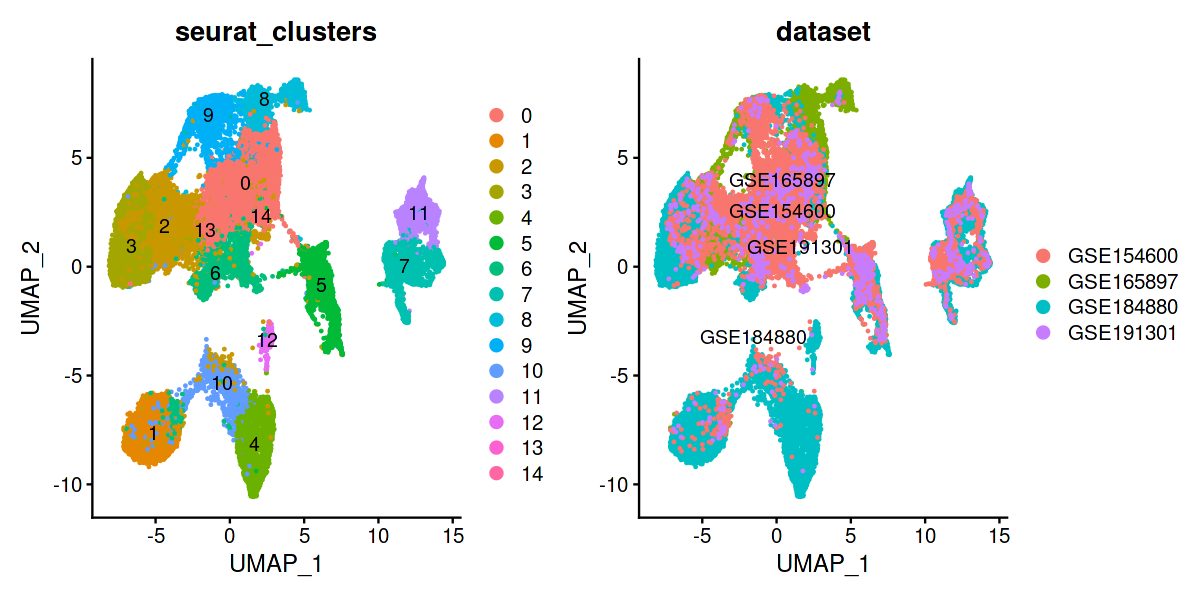

In [246]:
options(repr.plot.height = 5, repr.plot.width = 10)
DimPlot(object = mergeData_CAF,reduction = 'umap',group.by = c('seurat_clusters','dataset'),pt.size = 0.3, label = TRUE)

In [293]:
mergeData_CAF <- subset(mergeData_CAF,cellType !='unknow')

In [294]:
mergeData_CAF$cellType <- as.character(mergeData_CAF$cellType)

In [295]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 10)

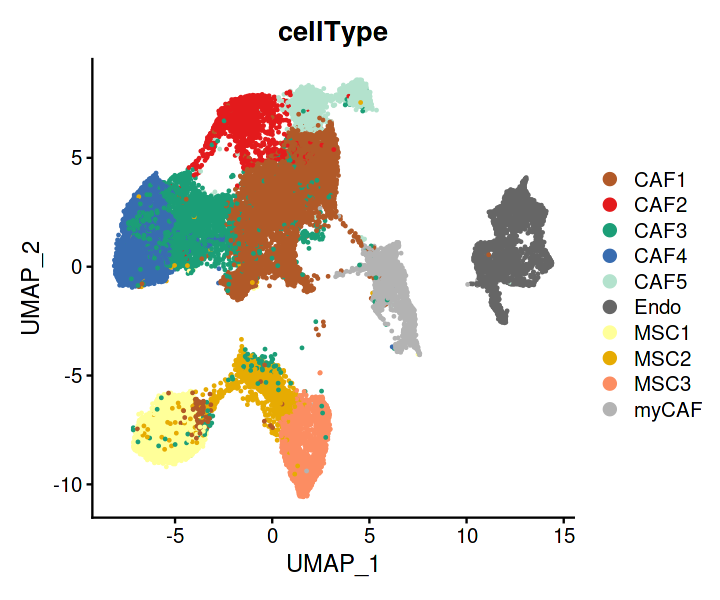

In [308]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimP <- DimPlot(object = mergeData_CAF,reduction = 'umap',group.by = c('cellType'),cols = cellType_col,pt.size = 0.3, label = F)
dimP

In [299]:
pdf(file = './output/bulk/section_3/0.CAFcell_DimPlot.pdf',width = 6,height = 5)
print(dimP)
dev.off()

png 
  2

In [297]:
saveRDS(mergeData_CAF,file='./output/1.sangleCell_pre/OV_mergeData_CAF.RDS')